# **Práctica 5 - Algoritmos de Búsqueda Parte 2.**

## **Nodos**

In [894]:
import random
import matplotlib.pyplot as plt

class Node:
    def __init__(self, strName, strValue, strNode):
        self.name = strName
        self.value = strValue
        self.next = strNode

    def __repr__(self):
        return f"{self.name} -> {self.value}"

def random_arr(size, low_lim, up_lim):
    arr = []
    i = 0
    while i < size:
        arr.append(Node("Nodo " + str(i + 1), str(random.randint(low_lim, up_lim)), None))
        i += 1
    return arr

def ordened_arr(size, low_lim, up_lim):
    arr = []
    i = 0
    while i < size:
        arr.append(Node("Nodo " + str(i + 1), str((i + low_lim) % up_lim), None))
        i += 1
    return arr

## **Función Hash**

In [906]:
def hashMod(string, size):
    try:
        float(string)
        return int(string) % size
    except:
        add = 0
        i = 0
        while i < len(string):
            add += ord(string[i])
            i += 1
        return add % size

## **Algoritmos**

### **Reasignación Lineal**

In [896]:
def insert_rea(table, node):
    collisions = 0
    time = 1
    space = 1
    i = hashMod(node.value, len(table))
    st_pos = i
    if table[i] is not None:
        collisions = 1
    while table[i] is not None:
        time += 1
        i = (i + 1) % len(table)
        if i == st_pos:
            print("Error: La tabla hash está llena.")
            return collisions, time, space
    table[i] = node
    return collisions, time, space

def search_rea(table, string):
    time = 0
    space = 0
    i = hashMod(string, len(table))
    st_pos = i
    space += 1
    while table[i] is not None:
        time += 1
        if table[i].value == string:
            return table[i], time, space
        i = (i + 1) % len(table)
        if i == st_pos:
            return None, time, space
    return None, time, space

#### **Prueba Reasignación Lineal**

In [897]:
MAX = 10
table = [None] * MAX
arr = random_arr(len(table), 0, len(table))


i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_rea(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
sought = "100" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_rea(table, sought)
if result is not None: print("El valor", sought, "se encontro en el", result.name)
else: print("El valor", sought, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor 100 no se encontro
Hubo 4 colisiones


### **Mejor Caso**

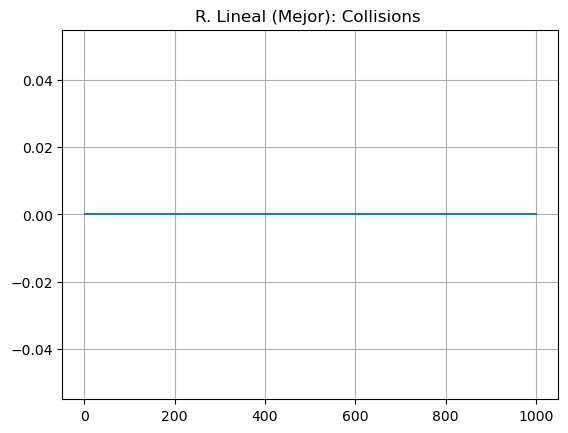

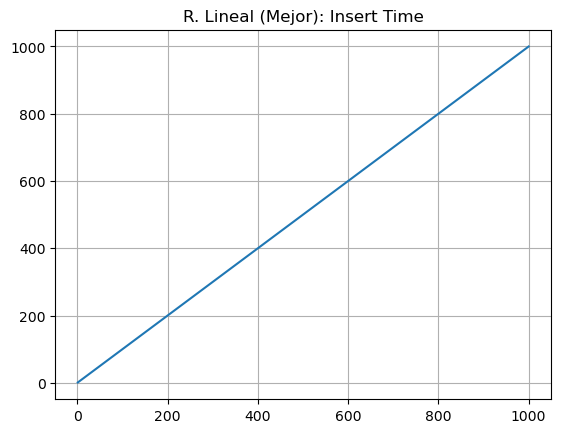

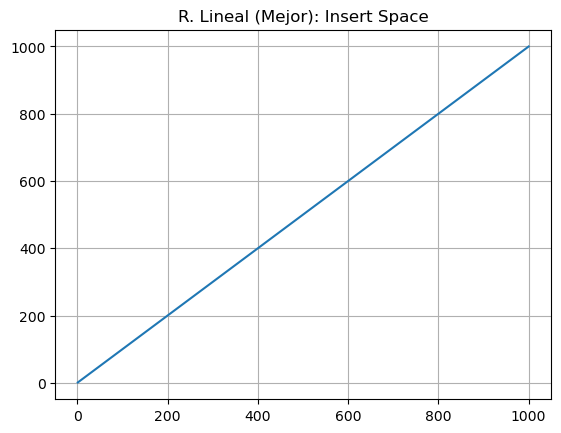

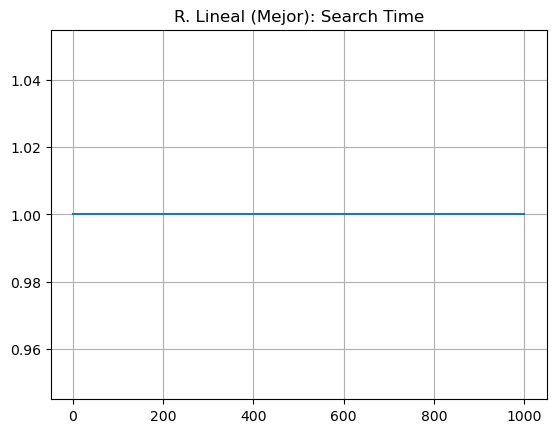

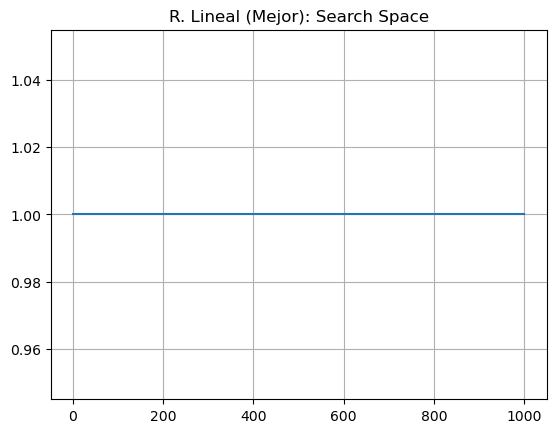

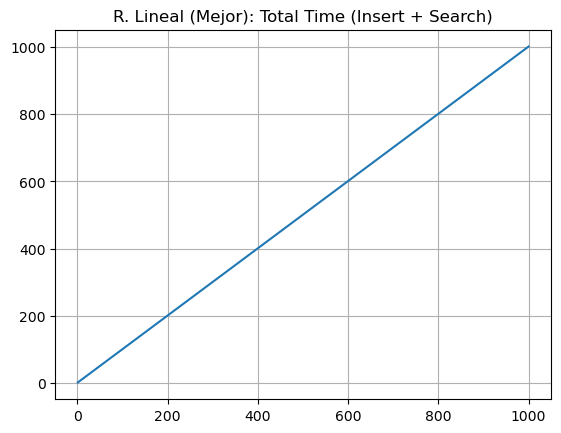

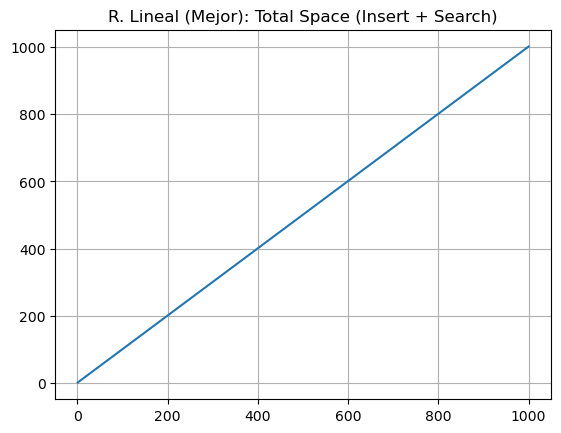

In [909]:
MAX = 1000
arr = ordened_arr(MAX, 0, MAX)
aux = []

x = []

y = []
y_collisions = []
y_time = []
y_space = []
y_time_insert = []
y_space_insert = []
y_time_search = []
y_space_search = []

for j in range (len(arr)):
    aux.append(arr[j])
    table = [None] * len(aux)
    
    i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
    collisions = 0
    time_insert = 0
    space_insert = 0
    while i < len(aux):
        collision, time, space = insert_rea(table, aux[i])
        collisions += collision
        time_insert += time
        space_insert += space
        i += 1

    sought = arr[len(aux) - 1].value # - - - - - - - - - - Search - - - - - - - - - -
    result, time_search, space_search = search_rea(table, sought)

    x.append(len(aux))

    y_collisions.append(collisions)

    y_time_insert.append(time_insert)
    y_space_insert.append(space_insert)
    
    y_time_search.append(time_search)
    y_space_search.append(space_search)
    
    y_time.append(time_insert + time_search)
    y_space.append(space_insert + space_search)

casos = [   {"titulo": "R. Lineal (Mejor): Collisions ", "datos_y": y_collisions},
            {"titulo": "R. Lineal (Mejor): Insert Time", "datos_y": y_time_insert},
            {"titulo": "R. Lineal (Mejor): Insert Space", "datos_y": y_space_insert},
            {"titulo": "R. Lineal (Mejor): Search Time", "datos_y": y_time_search},
            {"titulo": "R. Lineal (Mejor): Search Space", "datos_y": y_space_search},
            {"titulo": "R. Lineal (Mejor): Total Time (Insert + Search)", "datos_y": y_time},
            {"titulo": "R. Lineal (Mejor): Total Space (Insert + Search)", "datos_y": y_space}  ]

for caso in casos:
    plt.title(caso["titulo"])
    plt.plot(x, caso["datos_y"])
    plt.grid(True)
    plt.show()

### **Arreglos Anidados**

In [899]:
def insert_arr(table, node):
    collisions = 0
    time = 0
    space = 0
    i = hashMod(node.value, len(table))
    time += 1
    space += 1
    if table[i]:
        collisions = 1
    table[i].append(node)
    return collisions, time, space

def search_arr(table, string):
    time = 0
    space = 0
    i = hashMod(string, len(table))
    space += 1
    nodes_list = table[i]
    i = 0
    while i < len(nodes_list):
        time += 1
        node = nodes_list[i]
        if node.value == string:
            return node, time, space
        i += 1
    return None, time, space

#### **Prueba Arreglos Anidados**

In [900]:
MAX = 10
table = [[] for _ in range(MAX)] 
arr = random_arr(len(table), 0, len(table))

i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_arr(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1
    
sought = "100" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_arr(table, sought)
if result is not None: print("El valor", sought, "se encontro en el", result.name)
else: print("El valor", sought, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor 100 no se encontro
Hubo 2 colisiones


### **Encadenamiento**

In [901]:
def insert_en(table, node):
    collisions = 0
    time = 0
    space = 0
    i = hashMod(node.value, len(table))
    time += 1
    space += 1
    if table[i] is not None:
        collisions = 1
    node.next = table[i]
    table[i] = node
    return collisions, time, space

def search_en(table, string):
    time = 0
    space = 0
    i = hashMod(string, len(table))
    space += 1
    current = table[i]
    while current is not None:
        time += 1
        if current.value == string:
            return current, time, space
        current = current.next
    return None, time, space

#### **Prueba Encadenamiento**

In [902]:
MAX = 10
table = [None] * MAX
arr = random_arr(MAX, 0, MAX)

i = 0 # - - - - - - - - - - Insertion - - - - - - - - - -
collisions = 0
time_insert = 0
space_insert = 0
while i < len(table):
    collision, time, space = insert_en(table, arr[i])
    collisions += collision
    time_insert += time
    space_insert += space
    i += 1

sought = "100" # - - - - - - - - - - Search - - - - - - - - - -
result, time_search, space_search = search_en(table, sought)
if result is not None: print("El valor", sought, "se encontro en el", result.name)
else: print("El valor", sought, "no se encontro")
print("Hubo", collisions, "colisiones")

El valor 100 no se encontro
Hubo 4 colisiones
